# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hougha

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

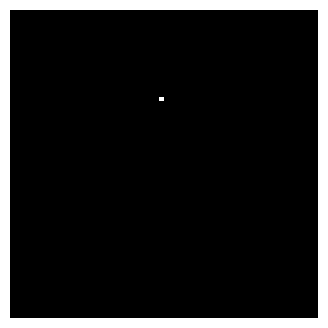

In [116]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os

if not os.path.exists("kwadraty.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png --no-check-certificate
if not os.path.exists("lab112.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png --no-check-certificate
if not os.path.exists("dom.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png --no-check-certificate

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [117]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

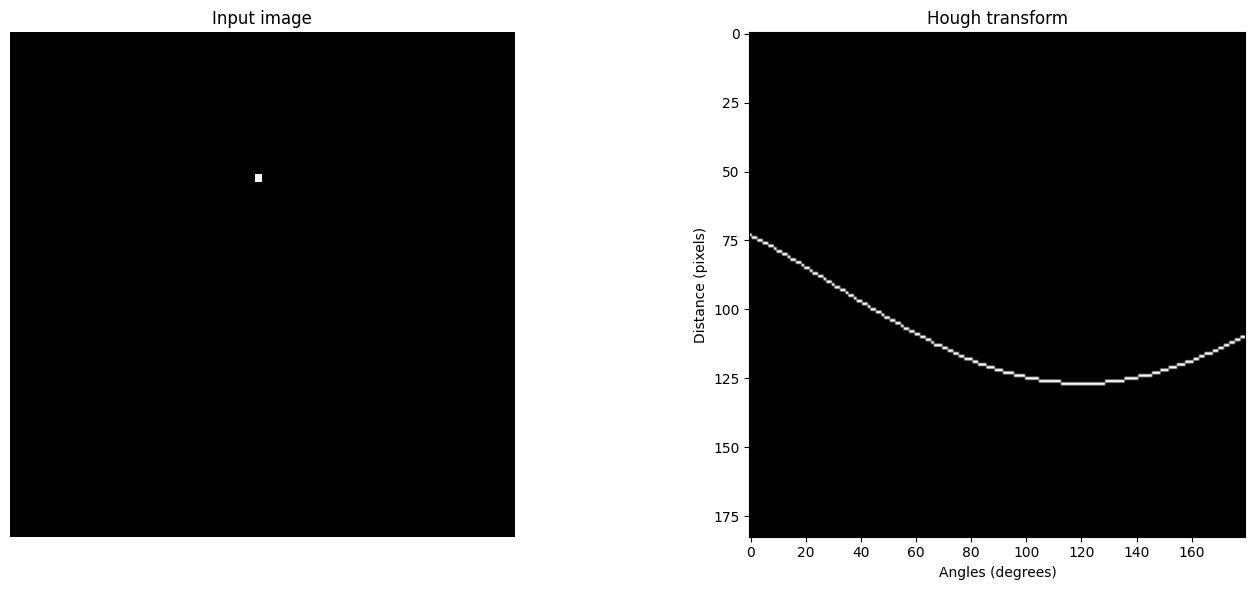

In [118]:
hough = hough_line(im)
show_hough(hough[0], im)

**Odpowiedź**

Pojedynczy punkt w przestrzeni Hougha wykąda jak kawałek wykresu funkcji trygonometrycznej- sinus lub cosinus.

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

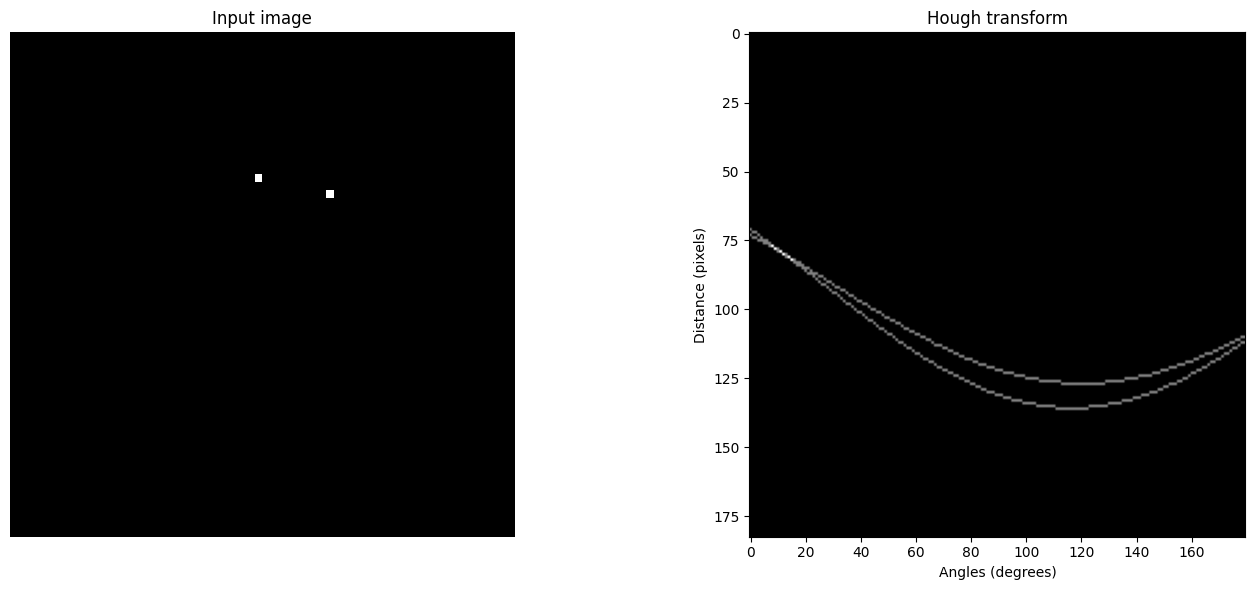

In [119]:
im_1 = np.zeros((64,64), dtype=np.uint8)
im_1[18, 31] = 1
im_1[20, 40] = 1
hough = hough_line(im_1)
show_hough(hough[0], im_1)

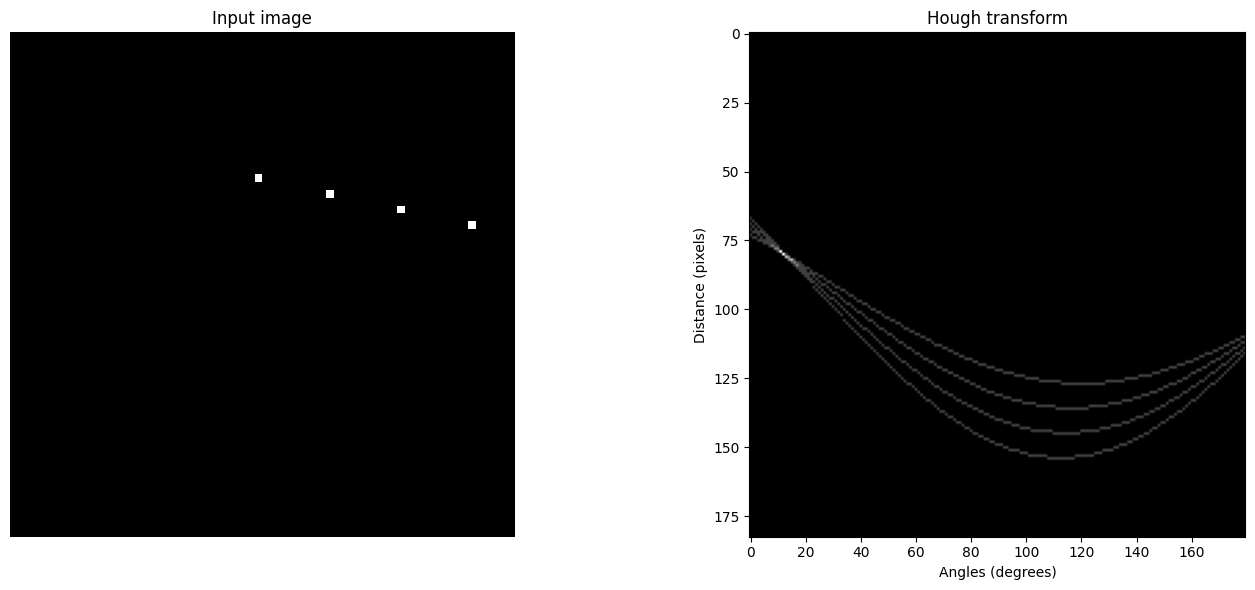

In [120]:
im_2 = np.zeros((64, 64), dtype=np.uint8)
im_2[18, 31] = 1
im_2[20, 40] = 1
im_2[22, 49] = 1
im_2[24, 58] = 1
hough = hough_line(im_2)
show_hough(hough[0], im_2)

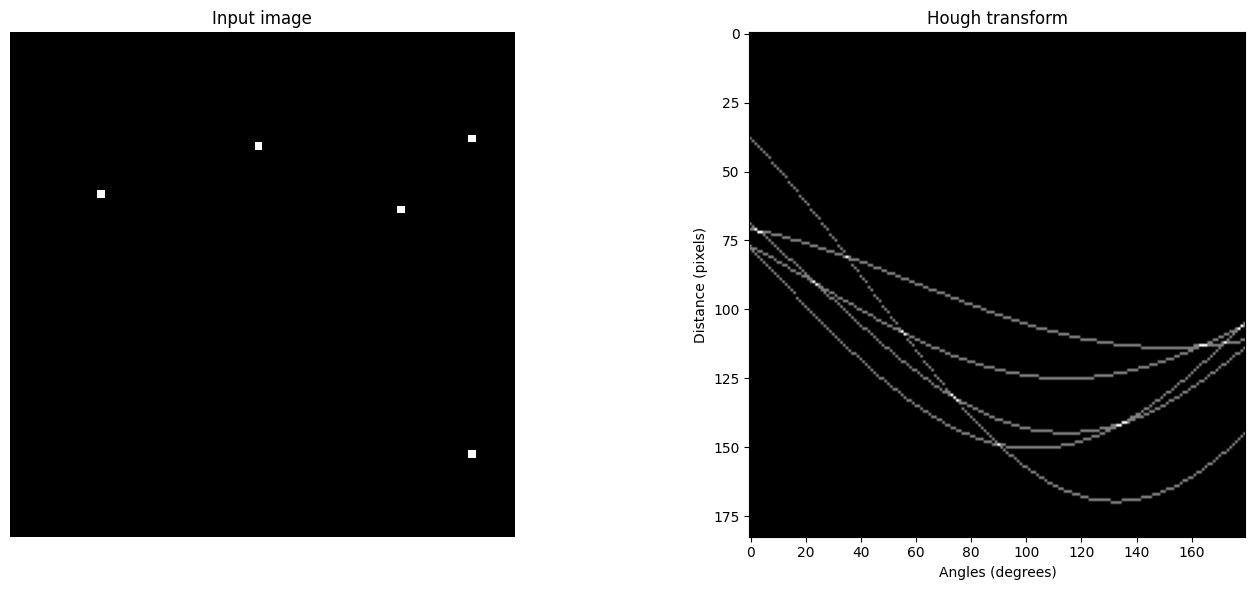

In [121]:
im_3 = np.zeros((64, 64), dtype=np.uint8)
im_3[14, 31] = 1
im_3[20, 11] = 1
im_3[22, 49] = 1
im_3[13, 58] = 1
im_3[53, 58] = 1
hough = hough_line(im_3)
show_hough(hough[0], im_3)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

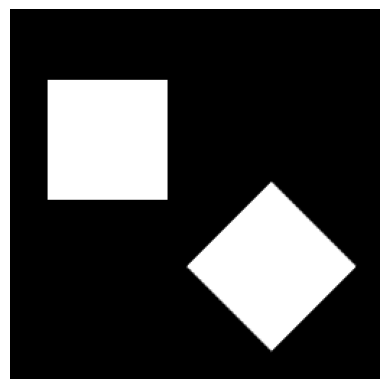

In [122]:
kwadraty = cv2.imread('kwadraty.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(kwadraty, 'gray')
plt.axis('off')
plt.show()

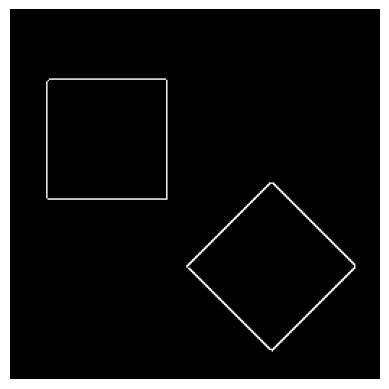

In [123]:
edges = cv2.Canny(kwadraty, 5, 10, None, 3, 1)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

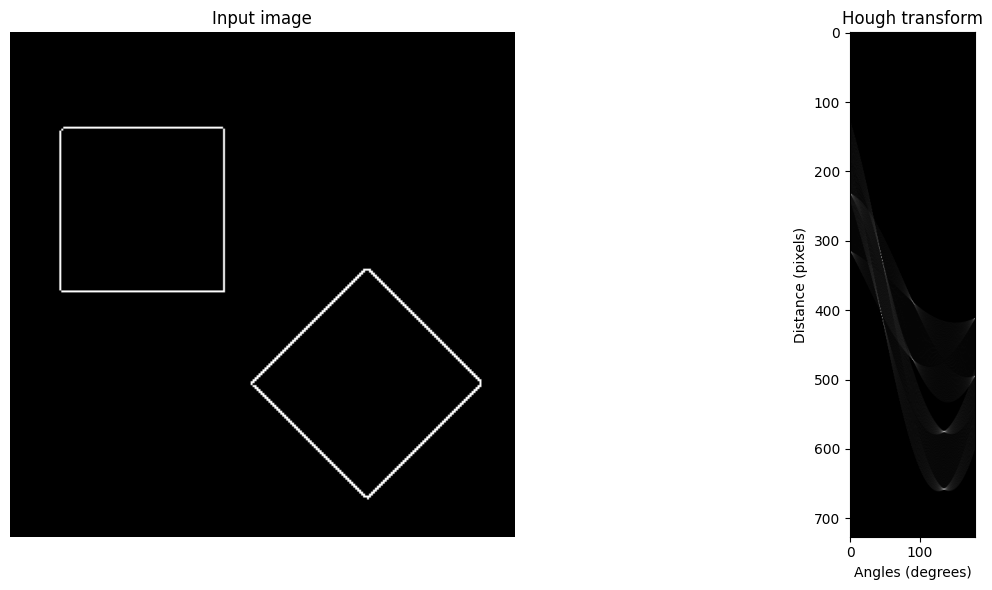

In [124]:
hough = hough_line(edges)
show_hough(hough[0], edges)

**Odpowiedź**

Widoczna jest właściwa liczba maksimów, ale można to zauważyć dopiero po wyrysowaniu okręgów.

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

<ipython-input-125-73c93757d64c>:18: RuntimeWarning: divide by zero encountered in true_divide
  y = (dist - x * np.cos(angle)) / np.sin(angle)


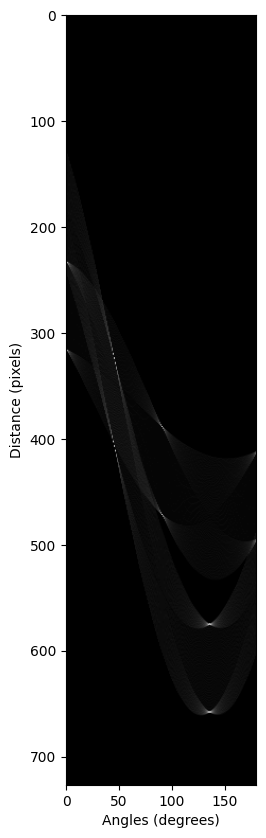

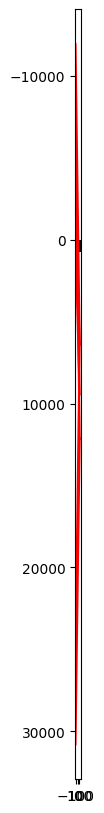

In [125]:
H, theta, rho = hough_line(edges)
fig, ax = plt.subplots(1, figsize=(15,10))
ax.set_aspect('equal')
ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha
ax.set_xlabel('Angles (degrees)')
ax.set_ylabel('Distance (pixels)')

threshold = 0.5 * np.max(H)
hough_peaks = hough_line_peaks(H, theta, rho, threshold=threshold)

fig, ax = plt.subplots(1, figsize=(15,10))
ax.set_aspect('equal')
ax.imshow(H, 'gray')

for _, angle, dist in zip(*hough_peaks):
    angle = np.deg2rad(angle)
    x = np.linspace(-0.5 * len(kwadraty[0]), 0.5 * len(kwadraty[0]), 1000)
    y = (dist - x * np.cos(angle)) / np.sin(angle)
    ax.plot(x, y, '-r')

plt.show()

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

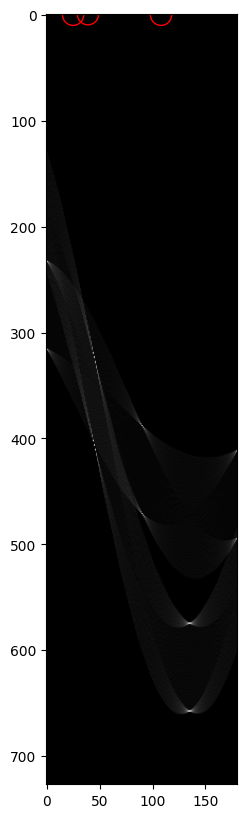

In [126]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_aspect('equal')
ax.imshow(H, 'gray')

for _, angle, dist in zip(*hough_peaks):
    angle = np.deg2rad(angle)
    x = dist * np.cos(angle)
    y = dist * np.sin(angle)
    circle = plt.Circle((x, y), 10, color='r', fill=False)
    ax.add_patch(circle)

plt.show()

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

In [127]:
kwadraty_1 = cv2.imread('kwadraty.png')
edges_1 = cv2.Canny(kwadraty_1, 70, 150, 3)
lines_1 = cv2.HoughLines(edges_1, 1, np.pi / 180, threshold=73)

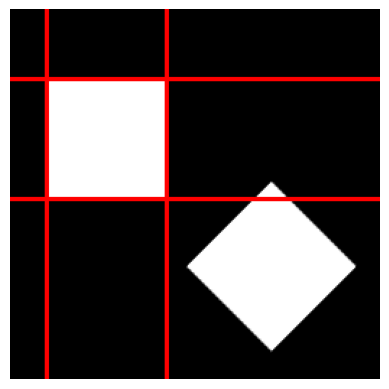

In [128]:
if lines_1 is not None:
    kwadraty = kwadraty_1.copy()
    for line in lines_1:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(kwadraty, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(kwadraty, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

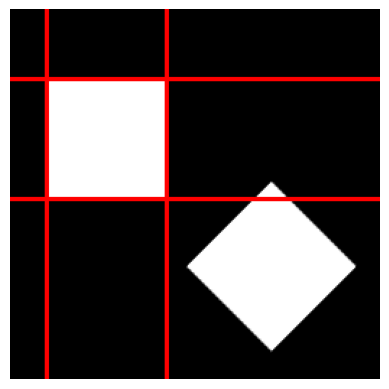

In [129]:
kwadraty_2 = cv2.imread('kwadraty.png')
edges_2 = cv2.Canny(kwadraty_2, 70, 150, 3)
lines_2 = cv2.HoughLinesP(edges_2, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

if lines_2 is not None:
    kwadraty = kwadraty_2.copy()
    for line in lines_2:
        x1, y1, x2, y2 = line[0]
        cv2.line(kwadraty_2, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(kwadraty, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

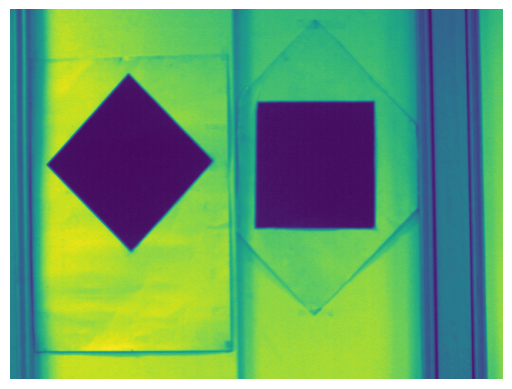

In [130]:
lab112 = cv2.imread('lab112.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(lab112)
plt.axis('off')
plt.show()

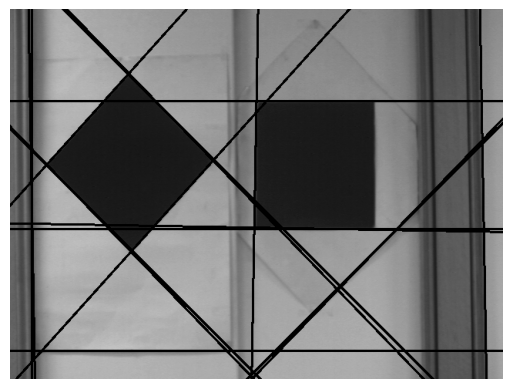

In [131]:
blur = cv2.GaussianBlur(lab112, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)

hough_lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

if hough_lines is not None:
    for line in hough_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(lab112, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(lab112, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

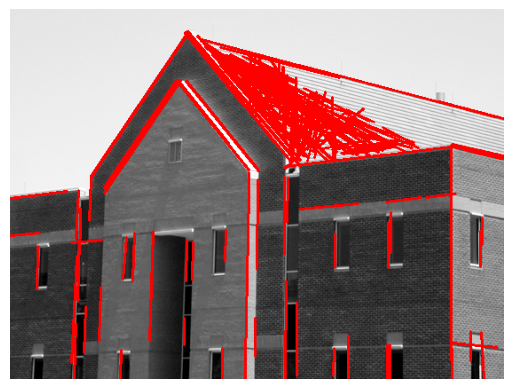

In [132]:
dom = cv2.imread('dom.png', cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(dom, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=20, minLineLength=30, maxLineGap=5)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(dom, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(dom, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()